<a href="https://colab.research.google.com/github/SantiagoHincapieCruz/Relationships-between-process-variables-and-modeling-in-a-manufacturing-plant-Real-process-/blob/main/Project_Customer_Personality_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/MIT DS/Project/Customer_Personality_Segmentation.csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [ ]:
data.info() #Prints information about a DataFrame includingthe index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**

dtypes: float64(1), int64(25), object(3): total(29)   
Education, Marital_Status,Dt_Customer this data as Objecs  
Income as float   
And the others segmentations variables as Intigers   

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
data.describe() #Generate descriptive statistics.Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##### **Observations:**

Income:mean:52247.25  Yearly household income (in dollars).

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
data.isnull().sum() #Count the number of missing values in each column.

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
data=data.dropna() #Remove the missing values
data.isnull().sum() #Count the number of missing values in each column.

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


##### **Observations:**

Yes, the Income column had 24 null values, .dropna remove the rows had missisng values,these null values ​​cannot be replaced with 0 because they can statistically affect some calculations. It should also be noted that 24 values ​​out of 2240 total only represent 1.07% of the total data.
Removing these data does not significantly impact the models.

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
anyduplicate=data.duplicated().any() #Check if there are any duplicate rows.
Contduplicated=data.duplicated().sum() #Count the number of duplicate rows.
print("Exist any duplicate",anyduplicate, "and how many duplicates are there",Contduplicated) #Prints the values to a stream, or to sys.stdout by default.

Exist any duplicate False and how many duplicates are there 0


##### **Observations:**

There are no duplicates in the data

Create Data Frames Segments

## **Exploratory Data Analysis**

In [ ]:
from datetime import datetime
now=datetime.now().year
data['Age']=now-data['Year_Birth']
customerhist=data[['Age','Income','Recency']].copy()
customerbar=data[['Kidhome','Teenhome','Complain']].copy()
spending=data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].copy()
interaction=data[['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].copy()
NumDeals=interaction[['NumDealsPurchases']].copy()
AcceptedandResponse=interaction[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].astype(bool).copy()
shopping=data[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].copy()
print(np.average(data.Age).round(1),np.mean(data.Income).round(-3))

56.2 52000.0


### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

**Customer Variables**

Text(0.5, 1.0, 'Age')

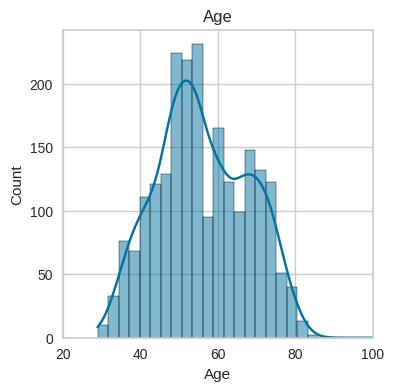

In [ ]:
plt.figure(figsize=(4, 4))
sns.histplot(data=customerhist,x='Age' ,kde=True)
plt.xlim(20,100)
plt.title('Age')

Text(0.5, 1.0, 'Income')

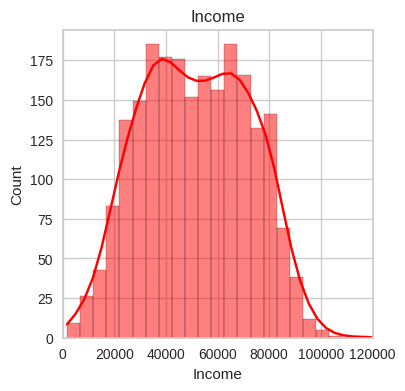

In [ ]:
plt.figure(figsize=(4, 4))
sns.histplot(data=customerhist,x='Income' ,kde=True, color='red')
plt.xlim(0,120000)
plt.title('Income')

Text(0.5, 1.0, 'Recency')

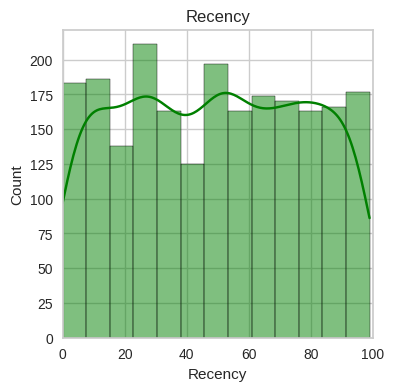

In [ ]:
plt.figure(figsize=(4, 4))
sns.histplot(data=customerhist,x='Recency' ,kde=True,color='green')
plt.xlim(0,100)
plt.title('Recency')

<Axes: xlabel='Kidhome', ylabel='percent'>

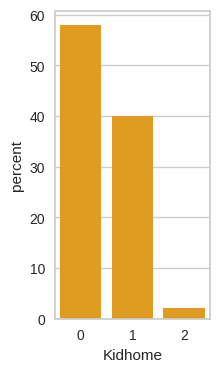

In [ ]:
plt.figure(figsize=(2, 4))
sns.countplot(data=customerbar,x='Kidhome',color='orange',stat='percent')

<Axes: xlabel='Teenhome', ylabel='percent'>

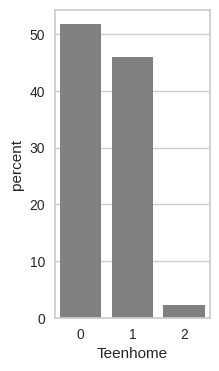

In [ ]:
plt.figure(figsize=(2, 4))
sns.countplot(data=customerbar,x='Teenhome',color='grey',stat='percent')

<Axes: xlabel='Complain', ylabel='percent'>

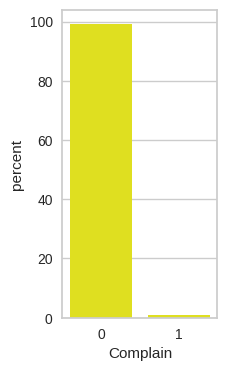

In [ ]:
plt.figure(figsize=(2, 4))
sns.countplot(data=customerbar,x='Complain',stat='percent',color='yellow')

**Spending Variables**

<Axes: title={'center': 'MntWines'}, xlabel='MntWines'>

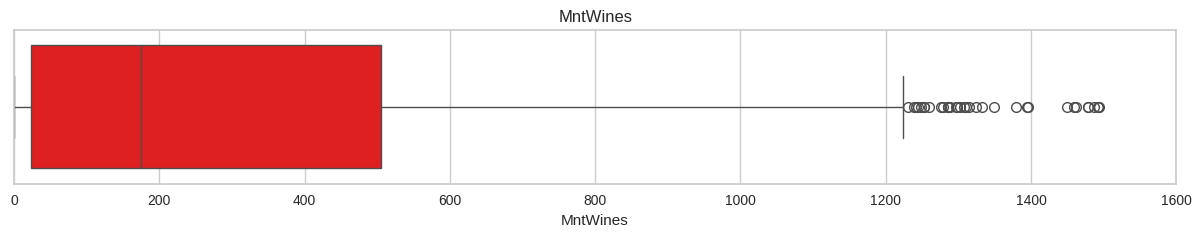

In [ ]:
plt.figure(figsize=(15, 2))
plt.title('MntWines')
plt.xlim(0,1600)
plt.xlabel('MntWines')
sns.axes_style('whitegrid')
sns.boxplot(data=spending , x='MntWines',color='red')

<Axes: title={'center': 'MntFruits'}, xlabel='MntFruits'>

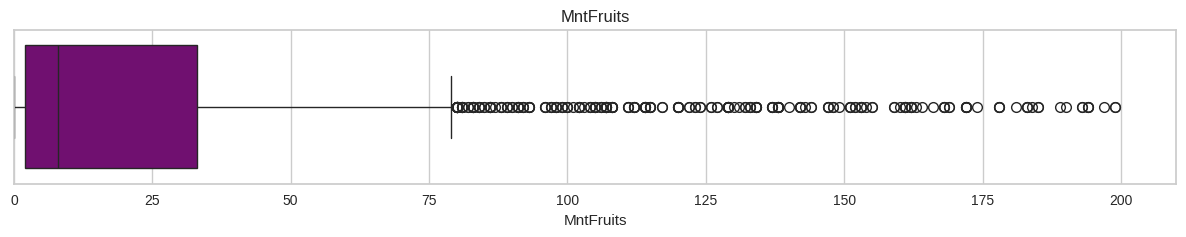

In [ ]:
plt.figure(figsize=(15, 2))
plt.title('MntFruits')
plt.xlim(0,210)
plt.xlabel('MntFruits')
sns.axes_style('whitegrid')
sns.boxplot(data=spending , x='MntFruits',color='purple')

<Axes: title={'center': 'MntMeatProducts'}, xlabel='MntMeatProducts'>

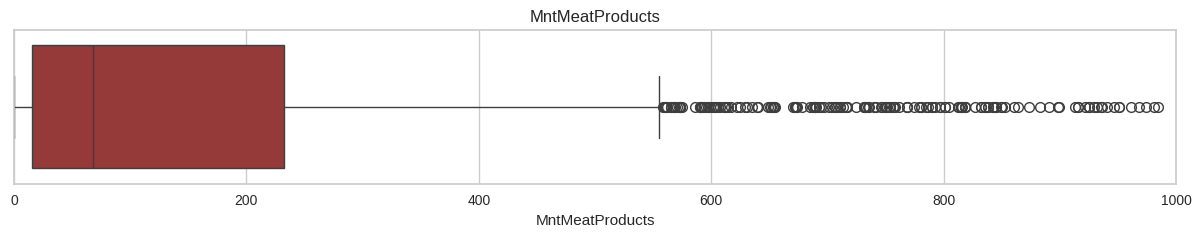

In [ ]:
plt.figure(figsize=(15, 2))
plt.title('MntMeatProducts')
plt.xlim(0,1000)
plt.xlabel('MntMeatProducts')
sns.axes_style('whitegrid')
sns.boxplot(data=spending , x='MntMeatProducts',color='brown')

<Axes: title={'center': 'MntFishProducts'}, xlabel='MntFishProducts'>

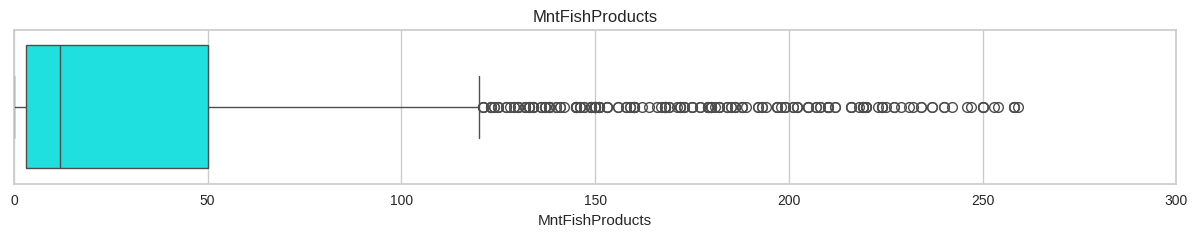

In [ ]:
plt.figure(figsize=(15, 2))
plt.title('MntFishProducts')
plt.xlim(0,300)
plt.xlabel('MntFishProducts')
sns.axes_style('whitegrid')
sns.boxplot(data=spending , x='MntFishProducts',color='cyan')

<Axes: title={'center': 'MntSweetProducts'}, xlabel='MntSweetProducts'>

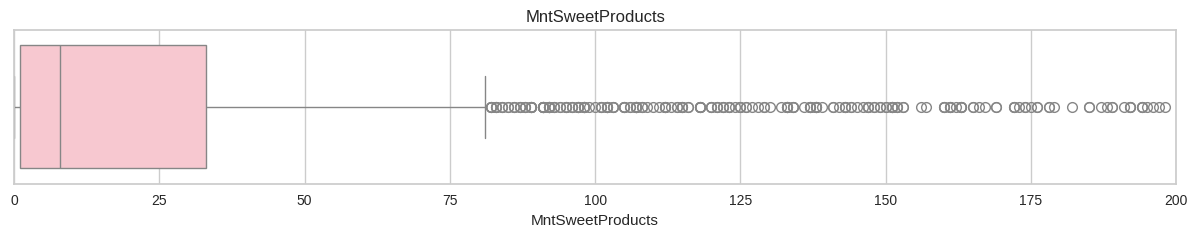

In [ ]:
plt.figure(figsize=(15, 2))
plt.title('MntSweetProducts')
plt.xlim(0,200)
plt.xlabel('MntSweetProducts')
sns.axes_style('whitegrid')
sns.boxplot(data=spending , x='MntSweetProducts',color='pink')

<Axes: title={'center': 'MntGoldProds'}, xlabel='MntGoldProds'>

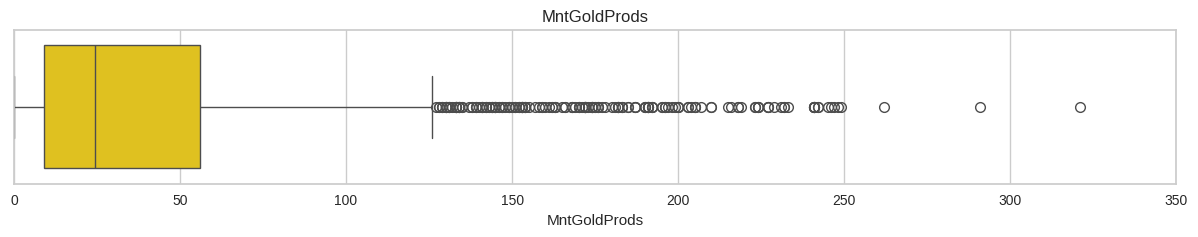

In [ ]:
plt.figure(figsize=(15, 2))
plt.title('MntGoldProds')
plt.xlim(0,350)
plt.xlabel('MntGoldProds')
sns.axes_style('whitegrid')
sns.boxplot(data=spending , x='MntGoldProds',color='gold')

**Interaction Variables**

Text(0.5, 1.0, 'NumDealsPurchases')

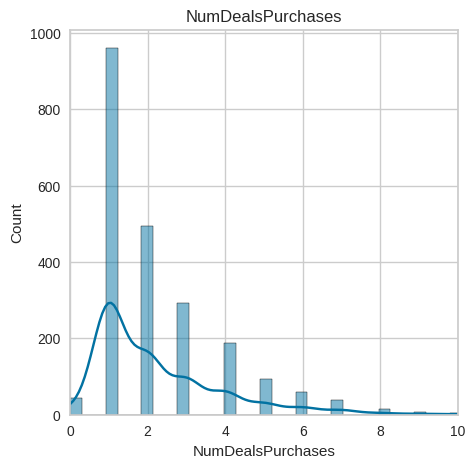

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data=NumDeals,x='NumDealsPurchases' ,kde=True)
plt.xlim(0,10)
plt.title('NumDealsPurchases')

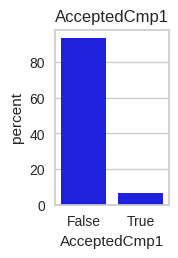

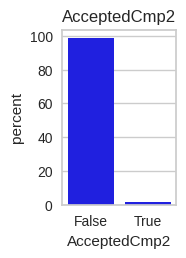

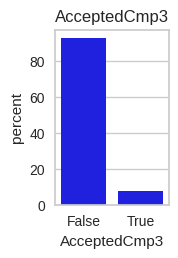

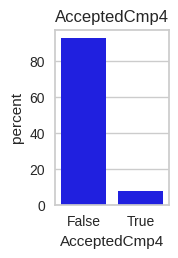

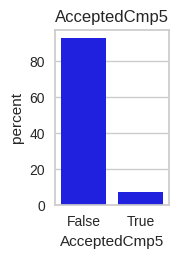

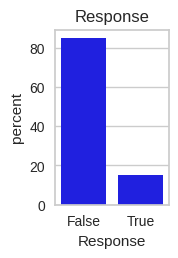

In [ ]:
for i,feature in enumerate(AcceptedandResponse):
  plt.figure(figsize=(5, 5))
  plt.subplot(2,3,i+1)
  sns.countplot(data=AcceptedandResponse,x=feature,stat='percent',color='blue')
  plt.title(feature)
  plt.show()

**Shopping Variables**

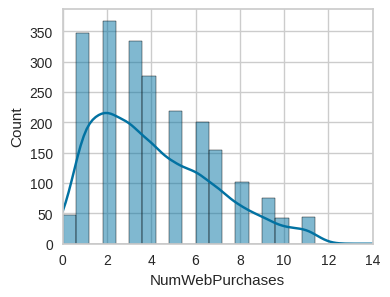

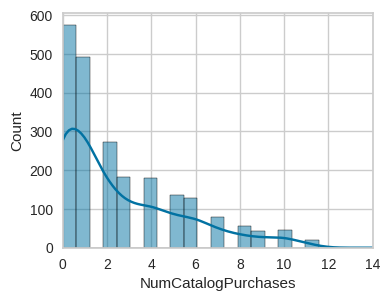

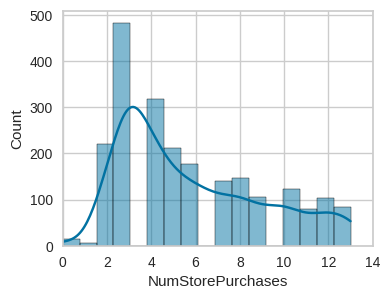

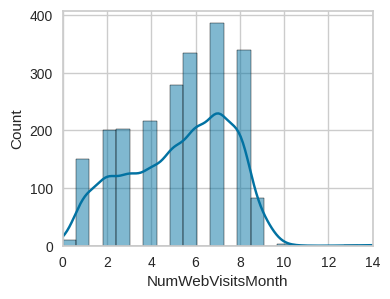

In [ ]:
for i,feature in enumerate(shopping):
  plt.figure(figsize=(4, 14))
  plt.subplot(4,1,i+1)
  sns.histplot(data=shopping,x=feature,stat='count' ,kde=True)
  plt.xlim(0,14)
  plt.show()

<Axes: title={'center': 'NumCatalogPurchases'}, xlabel='NumCatalogPurchases'>

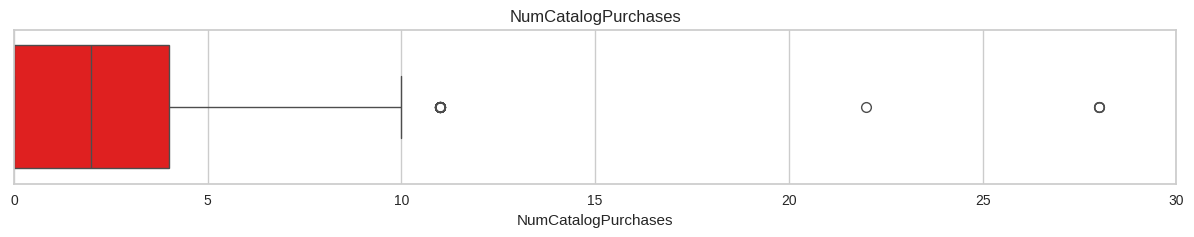

In [ ]:
plt.figure(figsize=(15, 2))
plt.title('NumCatalogPurchases')
plt.xlim(0,30)
plt.xlabel('NumCatalogPurchases')
sns.axes_style('whitegrid')
sns.boxplot(data=shopping , x='NumCatalogPurchases',color='red')

##### **Observations:**

<Axes: title={'center': 'NumStorePurchases'}, xlabel='NumStorePurchases'>

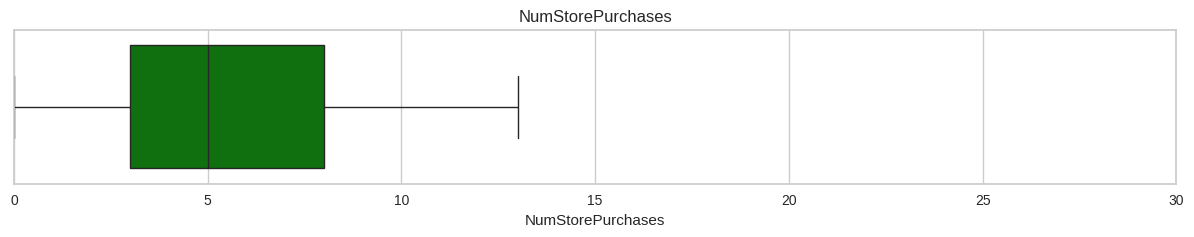

In [ ]:
plt.figure(figsize=(15, 2))
plt.title('NumStorePurchases')
plt.xlim(0,30)
plt.xlabel('NumStorePurchases')
sns.axes_style('whitegrid')
sns.boxplot(data=shopping , x='NumStorePurchases',color='green')

<Axes: title={'center': 'NumWebPurchases'}, xlabel='NumWebPurchases'>

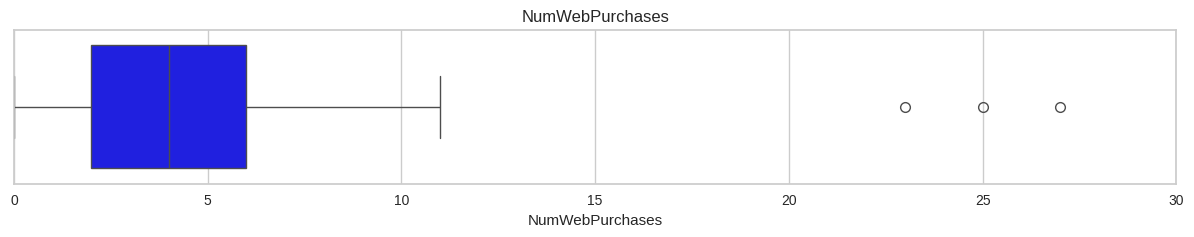

In [ ]:
plt.figure(figsize=(15, 2))
plt.title('NumWebPurchases')
plt.xlim(0,30)
plt.xlabel('NumWebPurchases')
sns.axes_style('whitegrid')
sns.boxplot(data=shopping , x='NumWebPurchases',color='blue')

<Axes: title={'center': 'NumWebVisitsMonth'}, xlabel='NumWebVisitsMonth'>

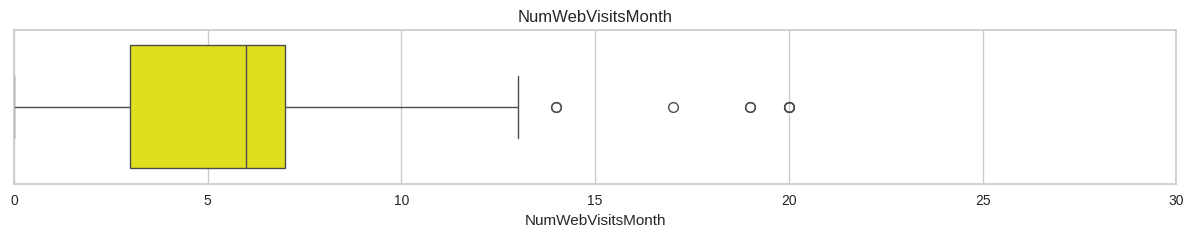

In [ ]:
plt.figure(figsize=(15, 2))
plt.title('NumWebVisitsMonth')
plt.xlim(0,30)
plt.xlabel('NumWebVisitsMonth')
sns.axes_style('whitegrid')
sns.boxplot(data=shopping , x='NumWebVisitsMonth',color='yellow')

In the univariate analysis we can highlight according to costumer, spending, interaction and shopping:  
**Costumer**:The majority of clients are over 40 years old, with an average of 57 years old, and have an annual income of over 30k USD, with a mean of over 52k USD.
More than 57% were reported to have no children, 40% had only one child, and around 52% had no teenagers in their household, and 46% had only one teenager.
Finally, the complaint rate is negligible.  
**Spending**:People spend more money on wine and fish than on other items, and spend much less on fruits and sweets.  
**Interaction**:People haven't purchased many additional products at a discount.
All campaigns have been failures, and the last campaign didn't even get 20% of the response rate.  
**Shopping**:Catalog sales are, on average, much lower than online or in-store sales. On average, the most common way to sell items is directly in the store.  

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

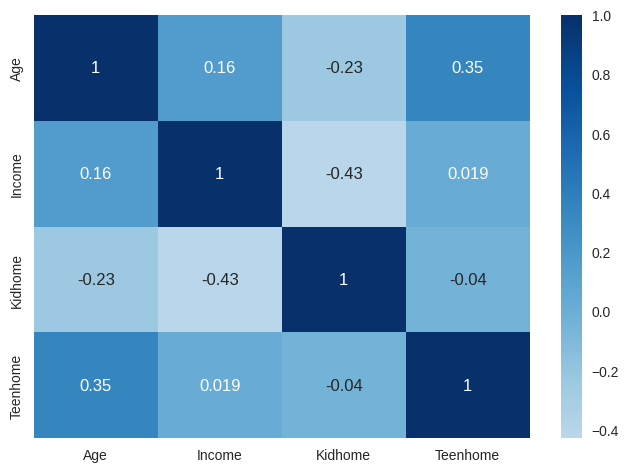

In [ ]:
sns.heatmap(data=data[['Age','Income','Kidhome','Teenhome']]
            .corr(),cmap='Blues',center=0,robust=True,annot=True);

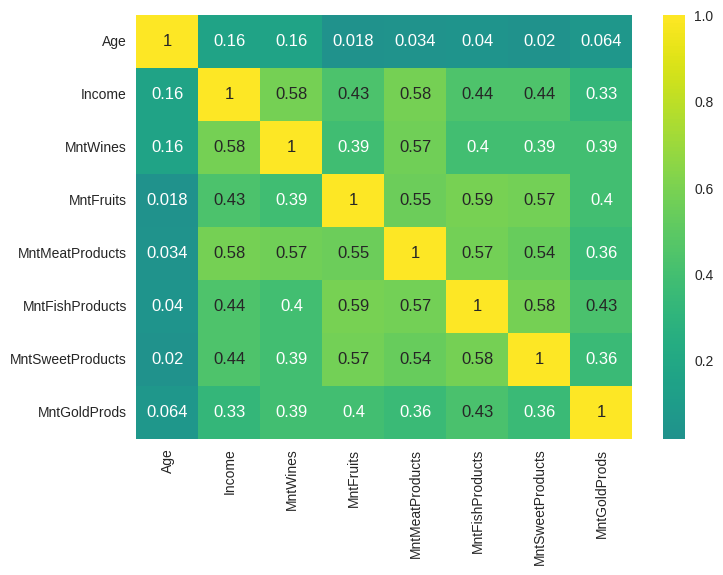

In [ ]:
sns.heatmap(data=data[['Age','Income','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
            .corr(),cmap='viridis',center=0,robust=True,annot=True);

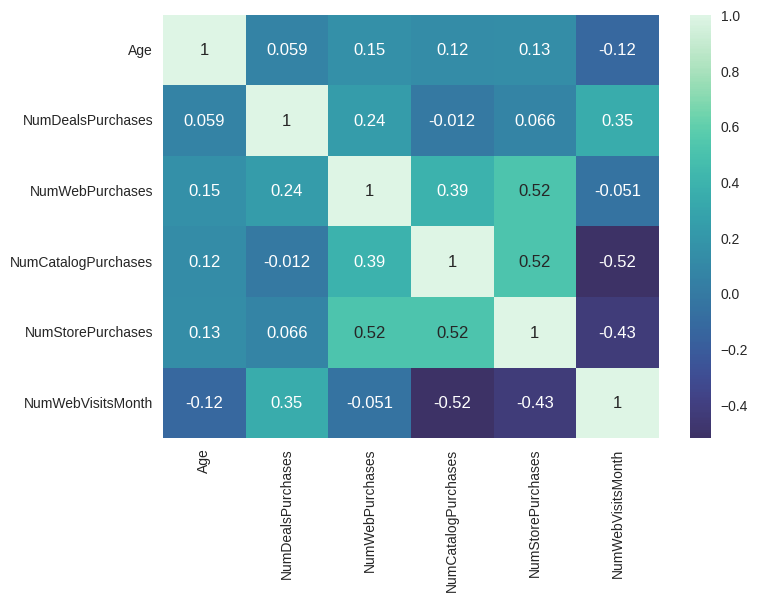

In [ ]:
sns.heatmap(data=data[['Age','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]
            .corr(),cmap='mako',center=0,robust=True,annot=True);

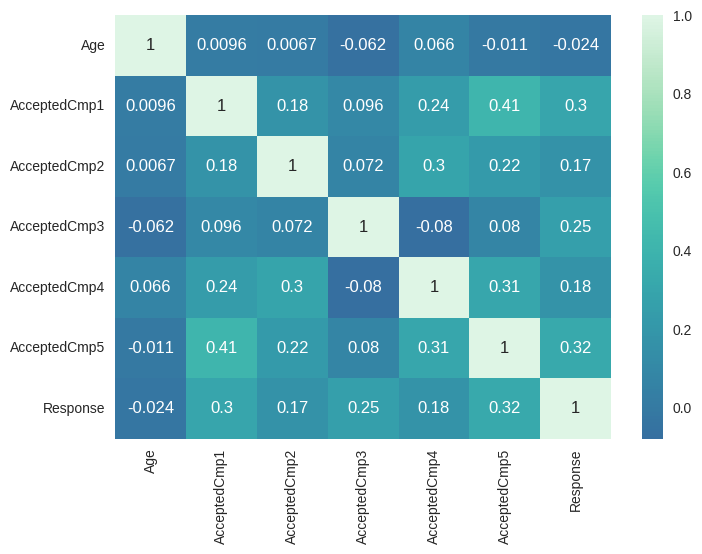

In [ ]:
sns.heatmap(data=data[['Age','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]
            .corr(),cmap='mako',center=0,robust=True,annot=True);

##### **Observations:**

From multivariate analysis, we can draw several conclusions:
The older the clients, the more adolescents they tend to be than children.
People with higher incomes generally buy more wine and meat products.
People generally consume meat products.

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

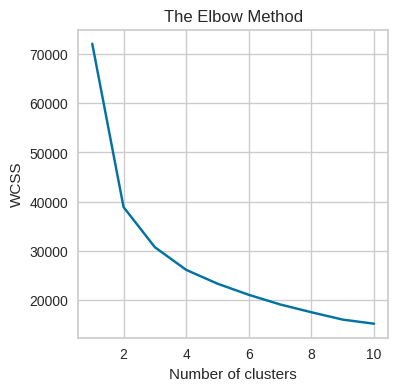

In [ ]:
WCSS={}
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42, n_init=10)
  kmeans.fit(shopping)
  WCSS[k]=kmeans.inertia_

plt.figure(figsize=(4,4))
plt.plot(WCSS.keys(),WCSS.values(),'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

##### **Observations:**

In the elbow method for shopping we can see that two good options would be to have k=2 or k=3.

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

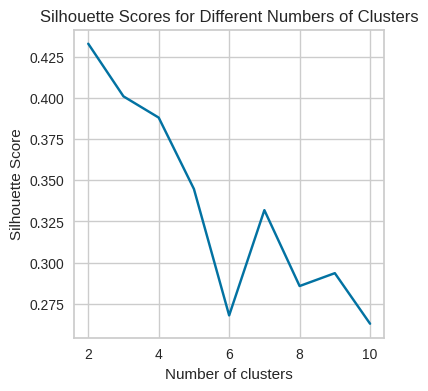

In [ ]:
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(shopping)
    silhouette_scores[k] = silhouette_score(shopping, kmeans.labels_)

plt.figure(figsize=(4, 4))
plt.plot(silhouette_scores.keys(), silhouette_scores.values(), 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

##### **Observations:**

The silhouette score, the optimal is k=2

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
import time
start_time = time.time()
kmeans_final = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_final.fit(shopping)
end_time = time.time()
total_fit_time = end_time - start_time
print("Total fit time:",total_fit_time, "seconds")

Total fit time: 0.020920991897583008 seconds


In [ ]:
%%time
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(shopping)

CPU times: user 6.89 ms, sys: 0 ns, total: 6.89 ms
Wall time: 8.26 ms


KMeans(n_clusters=2, random_state=0)

##### **Observations:**

The result varies depending on the method but in both cases it is in the order of milliseconds.

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
subset = shopping.copy()
subset_scaled = scaler.fit_transform(subset)
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
k_means_data = subset_scaled_data.copy

In [ ]:
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)
k_means_data = subset_scaled_data.copy()
k_means_data["K_means_segments"] = kmeans.labels_
shopping["K_means_segments"] = kmeans.labels_

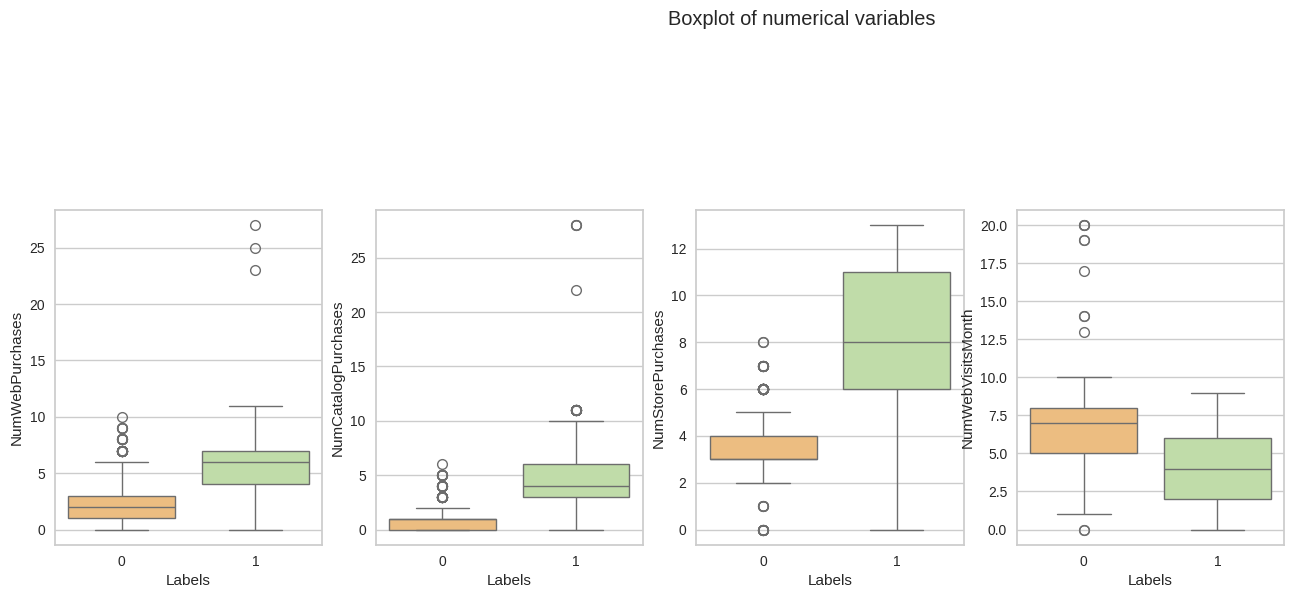

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables ")
for i, variable in enumerate(shopping.columns.to_list()[:-1]):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(data=data, x="Labels", y=variable, palette='Spectral')

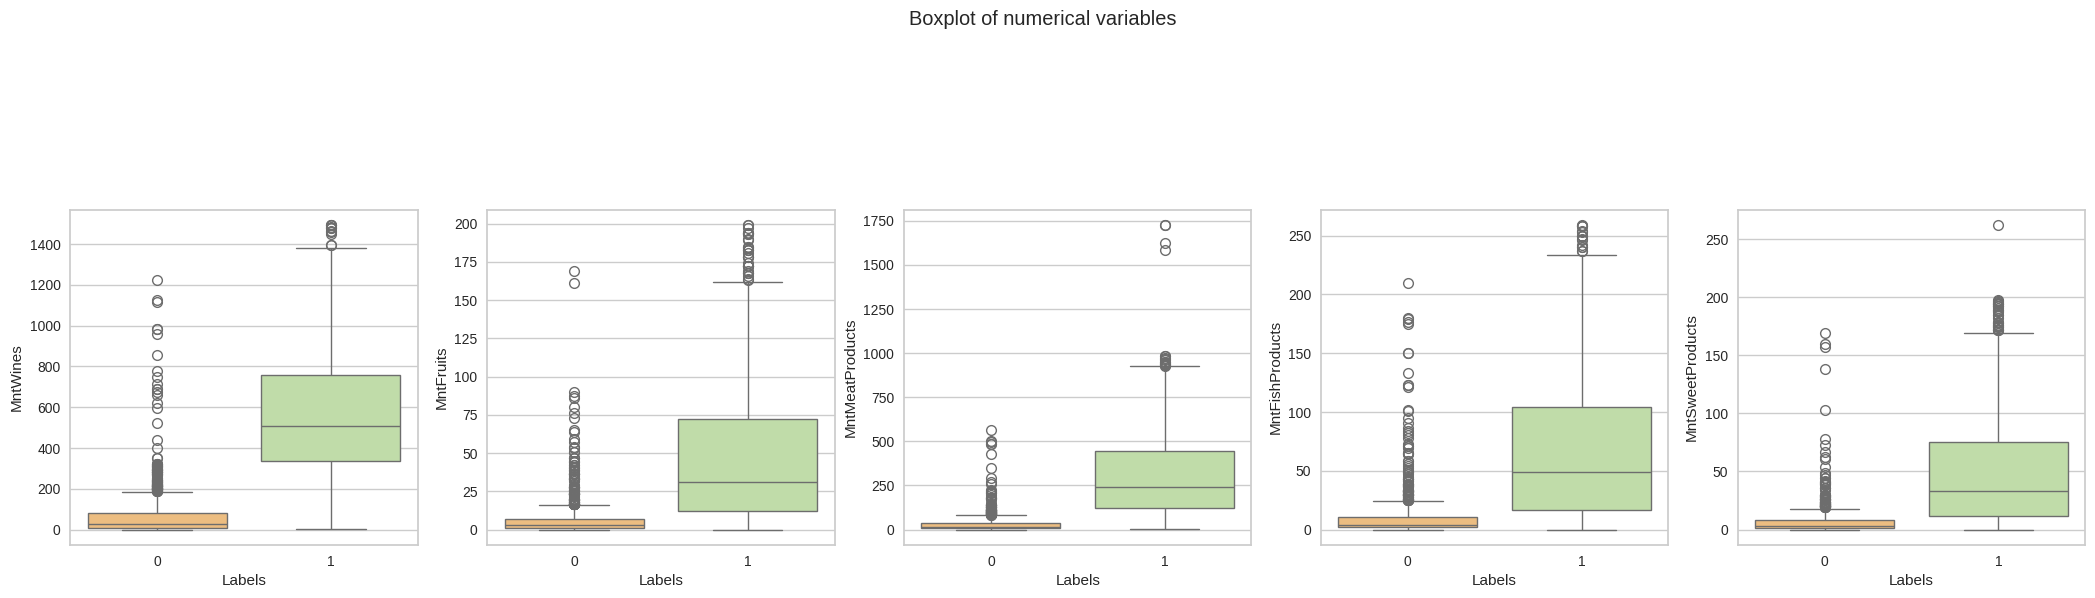

In [ ]:
plt.figure(figsize=(26, 20))
plt.suptitle("Boxplot of numerical variables ")
for i, variable in enumerate(spending.columns.to_list()[:-1]):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(data=data, x="Labels", y=variable, palette='Spectral')

##### **Observations:**

Group 1 (green) appears to be a customer group that makes significantly more purchases overall (web, catalog, and in-store) compared to Group 0. This suggests that Group 1 could be a high-value customer segment or major buyers.
Group 0 (orange) makes more monthly website visits than Group 1, despite making fewer online purchases.
Across all product categories shown, Group 1 consistently spends significantly more than Group 0. This reinforces the idea that Group 1 represents a customer segment with much greater purchasing power or propensity to spend.

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

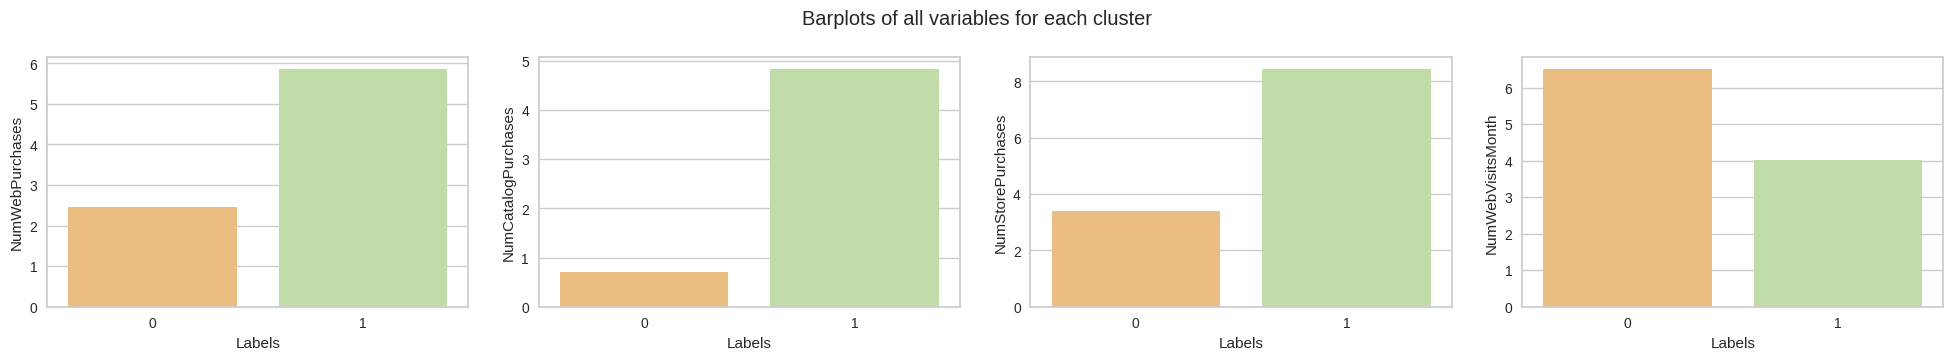

In [ ]:
plt.figure(figsize=(20, 20) )
plt.suptitle("Barplots of all variables for each cluster")

for i, variable in enumerate(shopping.columns.to_list()[:-1]):
    plt.subplot(6, 4, i + 1)
    sns.barplot(data=data, x="Labels", y=variable, palette='Spectral', errorbar=None)
plt.tight_layout(pad=2.0)

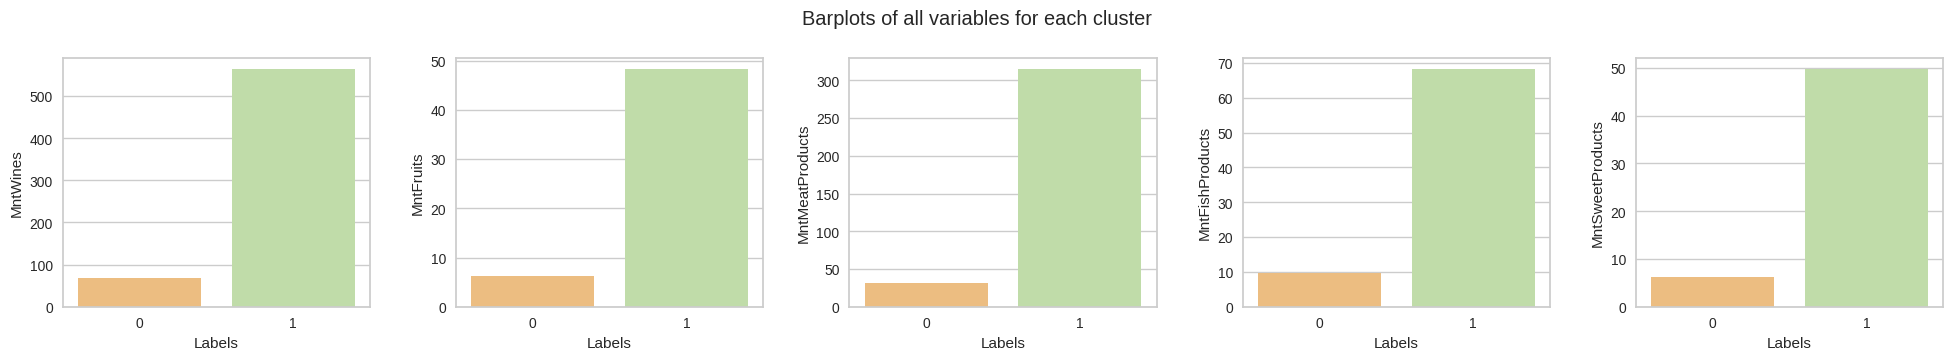

In [ ]:
plt.figure(figsize=(20, 20) )
plt.suptitle("Barplots of all variables for each cluster")

for i, variable in enumerate(spending.columns.to_list()[:-1]):
    plt.subplot(6, 5, i + 1)
    sns.barplot(data=data, x="Labels", y=variable, palette='Spectral', errorbar=None)
plt.tight_layout(pad=2.0)

##### **Observations:**

Cluster 1 appears to represent customers with a higher purchase volume across all channels (web, catalog, and store), while Cluster 0 appears to be characterized by a higher frequency of website visits but a lower purchase volume.  
Cluster 1 represents customers who spend considerably more money on all product categories analyzed (wines, fruits, meat, fish, and sweets) compared to Cluster 0, which spends much less on all of these categories. This indicates a clear difference in purchasing behavior between the two clusters, with Cluster 1 being the most valuable in terms of spending on these product categories.

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

We previously know that all the campaigns have been a failure, the company must radically change its way of generating campaigns

**Strategies for Group 1**  Use their purchasing data to send them highly relevant offers and product recommendations. For example, if they buy a lot of wine, send them information about new vintages or pairings. Use this to create marketing campaigns and discounts.  Given their high spending propensity, identify opportunities to cross-sell complementary products (for example, if they buy meat, suggest gourmet condiments) and upsell higher-value products.
Closely monitor their activity to identify any decrease in purchases and proactively respond with reactivation offers or surveys to understand possible reasons.

**Strategies for Group 0** For those who haven't purchased yet or are buying infrequently, offer attractive discounts or free shipping on their first purchase to encourage them to take the plunge.
Use remarketing campaigns to remind them of products they've viewed or abandoned carts. Offer a small incentive to complete the purchase.
Implement short surveys on your website to understand their interests and the reasons why they don't buy again. This can provide valuable information to refine your strategies.